In [1]:
import matplotlib.pyplot as plt
import torch, torchvision
import torch.optim as optim
import torch.nn.functional as F
from torch_funcs import FullyConnectedNet, fit, test, get_mnist_loaders

In [5]:
# config
batch_size = 128
test_batch_size = 512
epochs = 5
lr = 1e-2
momentum = 0.9
log_interval = 200
loss_func = F.nll_loss # FCNet return log_softmax -> with nll eq to cross entropy

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

CUDA enabled: True


In [6]:
train_dl, _, test_dl = get_mnist_loaders(batch_size, test_batch_size)

In [7]:
model = FullyConnectedNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

train_history = []
acc_history = []

for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, optimizer=optimizer, log_interval=log_interval, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

Train Epoch: 1 -> batch: 199 [25472/60000 (42%)]	Loss: 0.880325
Train Epoch: 1 -> batch: 399 [51072/60000 (85%)]	Loss: 0.412230
Train Epoch: 2 -> batch: 199 [25472/60000 (42%)]	Loss: 0.338621
Train Epoch: 2 -> batch: 399 [51072/60000 (85%)]	Loss: 0.327863
Train Epoch: 3 -> batch: 199 [25472/60000 (42%)]	Loss: 0.287560
Train Epoch: 3 -> batch: 399 [51072/60000 (85%)]	Loss: 0.263858
Train Epoch: 4 -> batch: 199 [25472/60000 (42%)]	Loss: 0.238059
Train Epoch: 4 -> batch: 399 [51072/60000 (85%)]	Loss: 0.219931
Train Epoch: 5 -> batch: 199 [25472/60000 (42%)]	Loss: 0.200292
Train Epoch: 5 -> batch: 399 [51072/60000 (85%)]	Loss: 0.204895


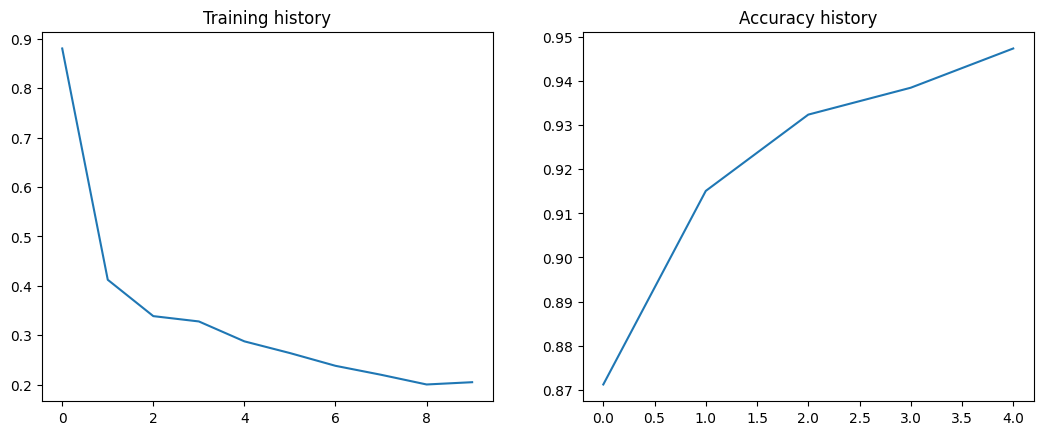

In [8]:
fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history)
ax_test.plot(acc_history)
ax_train.set_title('Training history')
ax_test.set_title('Accuracy history')

plt.show(fig)